In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.listdir('/Users/divyangshah/Downloads/UBER RAW DATA')

['uber_analysis_shan_singh.ipynb',
 'other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [4]:
uber_15 = pd.read_csv('/Users/divyangshah/Downloads/UBER RAW DATA/uber-raw-data-janjune-15_sample.csv')

## Check the data.

In [5]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [6]:
uber_15.shape

(100000, 4)

In [7]:
uber_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Dispatching_base_num  100000 non-null  object
 1   Pickup_date           100000 non-null  object
 2   Affiliated_base_num   98882 non-null   object
 3   locationID            100000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


## Check for any duplicate rows and delete if any.

In [8]:
uber_15.duplicated().sum()

54

In [9]:
uber_15.drop_duplicates(inplace = True)

In [10]:
uber_15.duplicated().sum()

0

## Check for any missing values in the data.

In [11]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

## Convert the date time column data in datetime format.

In [12]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [13]:
uber_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99946 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Dispatching_base_num  99946 non-null  object        
 1   Pickup_date           99946 non-null  datetime64[ns]
 2   Affiliated_base_num   98830 non-null  object        
 3   locationID            99946 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ MB


## Perform exploratary data analysis

* Analyzing which month have the maximum uber pickups

In [14]:
uber_15['Month'] = uber_15['Pickup_date'].dt.month_name()
uber_15['Weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Weekday
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday


<Axes: xlabel='Month'>

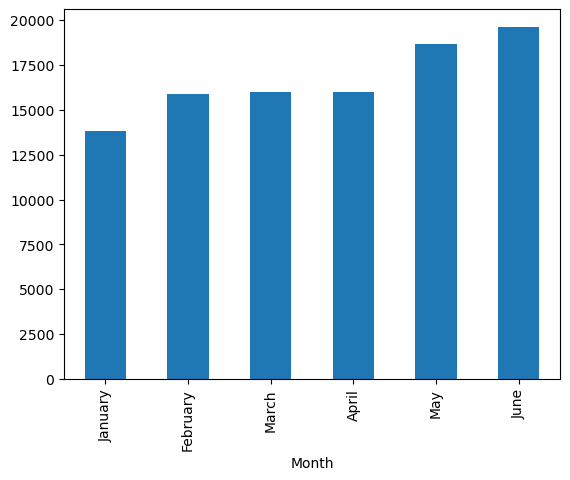

In [15]:
A = uber_15['Month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
A = A.reindex(month_order)
A.plot(kind = 'bar')

$\rightarrow$ Based on the above bar chart, it can be interpreted that the pick-ups have been steadily increased from January to June.

In [16]:
pivot = pd.crosstab(index =uber_15['Month'], columns = uber_15['Weekday'] )
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(month_order)
pivot = pivot[weekday_order] 
pivot

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Month,,,,,,,
January,1353,1444,1740,2378,2508,2745,1651
February,1970,2129,2013,2396,2655,2550,2183
March,2115,2388,2007,2093,2465,2522,2379
April,1833,1880,2521,2823,2365,2508,2052
May,1865,2115,2328,2627,3262,3519,2944
June,2848,3187,2503,2767,2793,3037,2485


Text(0.5, 1.0, 'Monthly Pick-up insights')

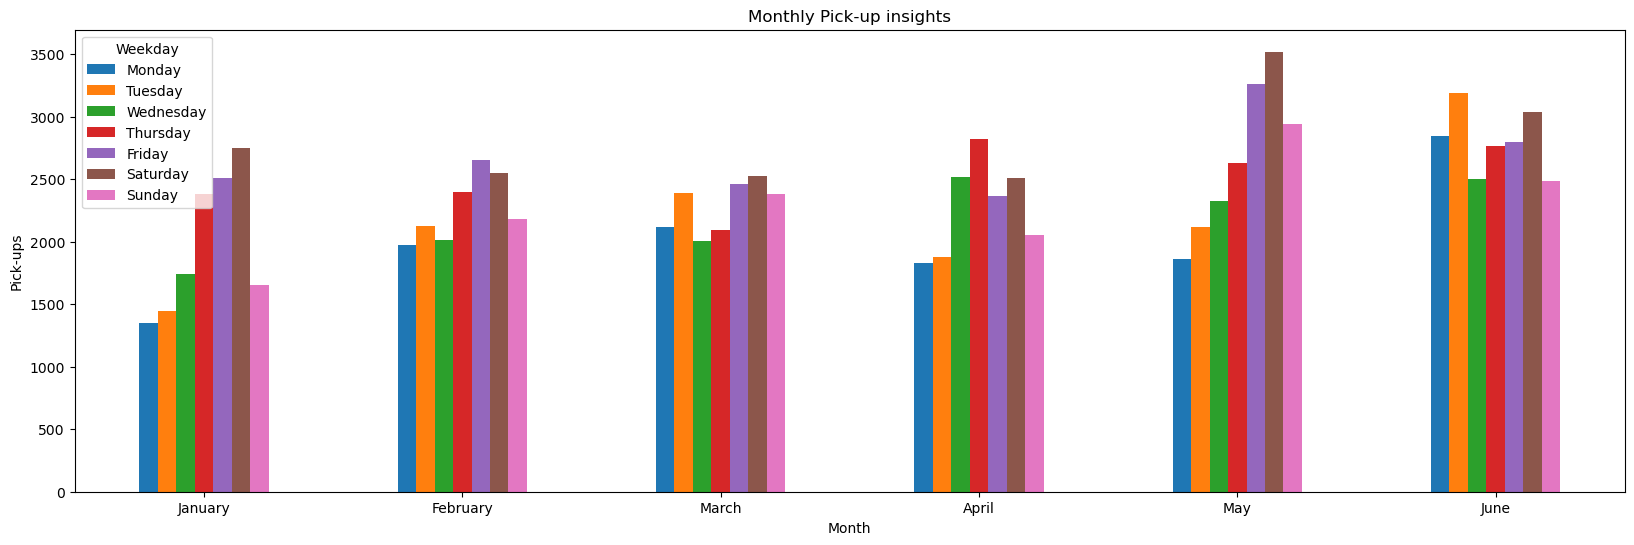

In [17]:
pivot.plot(kind = 'bar',figsize=(20,6))
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Pick-ups')
plt.title('Monthly Pick-up insights')

$\rightarrow$ Pick-ups increased steadily from January to June, peaking in May and June — indicating growing activity toward mid-year.\
$\rightarrow$ Fridays and Saturdays consistently recorded the highest number of pick-ups across all months, while Mondays, Tuesdays and Wednesdays remained the lowest.\
$\rightarrow$ After the high demand on Fridays and Saturdays, Sundays have shown a drastic dip in demands.\
$\rightarrow$ In April month, peak in observed in the weekday (on Thurday) and the pickups on Wednesday and Thursday are more than pickups on Friday and Saturday.

* Analyzing the hourly rush.

In [18]:
uber_15['Hour'] = uber_15['Pickup_date'].dt.hour
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Weekday,Hour
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,21
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,19
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,20
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,17
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,7


In [19]:
Hourly_data = uber_15.groupby(['Weekday', 'Hour']).size().reset_index(name = 'Pick-ups')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Hourly_data['Weekday'] = pd.Categorical(Hourly_data['Weekday'], categories=weekday_order, ordered=True)
Hourly_data = Hourly_data.sort_values(['Weekday', 'Hour'])
Hourly_data

,Weekday,Hour,Pick-ups
24,Monday,0,339
25,Monday,1,178
26,Monday,2,109
27,Monday,3,100
28,Monday,4,139
...,...,...,...
91,Sunday,19,711
92,Sunday,20,697
93,Sunday,21,615
94,Sunday,22,658


Text(0.5, 1.0, 'Hourly Pick-up insights')

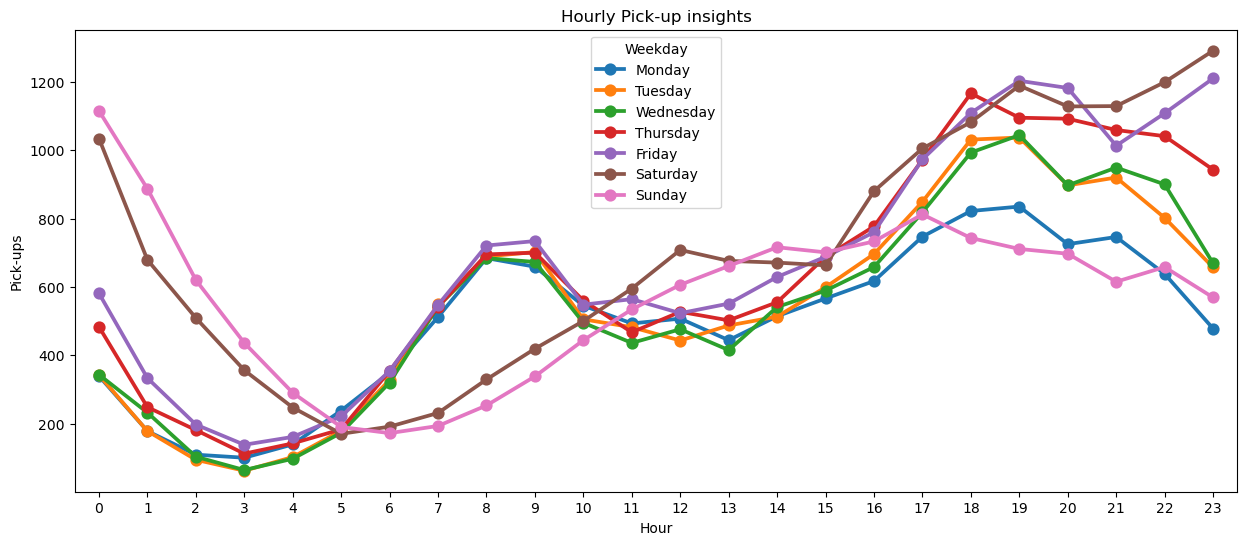

In [20]:
plt.figure(figsize = (15,6))
sns.pointplot(x = 'Hour', y = 'Pick-ups', hue = 'Weekday', data = Hourly_data)
plt.title('Hourly Pick-up insights')

* Analysing the base number with respect to the number of active vehicles.

In [21]:
# Extracting the data of the active vehicles and base numbers from the sheet - 'Uber-Jan-Feb-FOIL.csv'

In [24]:
uber_foil = pd.read_csv('/Users/divyangshah/Downloads/UBER RAW DATA/Uber-Jan-Feb-FOIL.csv')
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [25]:
uber_foil.shape

(354, 4)

In [27]:
uber_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

In [31]:
uber_foil_active = uber_foil.groupby('dispatching_base_number')['active_vehicles'].sum()
uber_foil_active

dispatching_base_number
B02512     13125
B02598     58653
B02617     79758
B02682     71431
B02764    217290
B02765     22575
Name: active_vehicles, dtype: int64

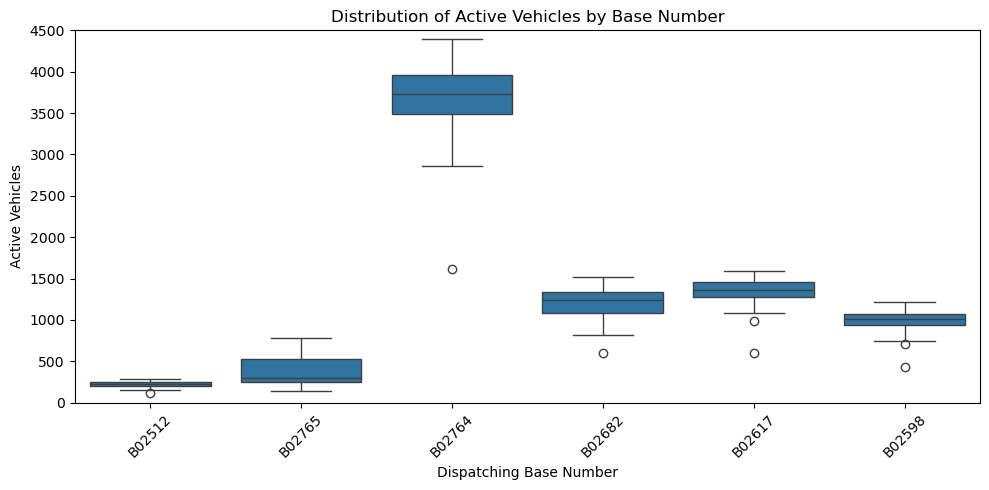

In [37]:
# Creating just a visual summary 
plt.figure(figsize = (10,5))
sns.boxplot(x = 'dispatching_base_number', y = 'active_vehicles', data = uber_foil)
plt.title('Distribution of Active Vehicles by Base Number')
plt.xlabel('Dispatching Base Number')
plt.ylabel('Active Vehicles')
plt.ylim(0, 4500)
plt.yticks(np.arange(0, 4501, 500)) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


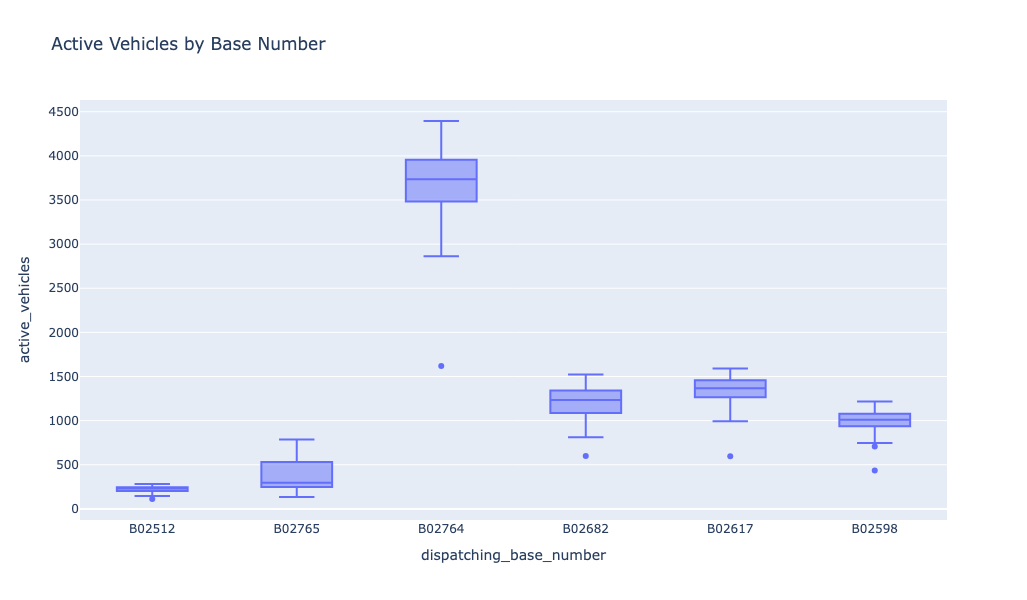

<Figure size 1000x500 with 0 Axes>

In [43]:
# Creating just am interactive summary with information about the 5-data points.
import plotly.express as px
plt.figure(figsize = (10,5))
fig = px.box( x = 'dispatching_base_number', y = 'active_vehicles', data_frame = uber_foil, title='Active Vehicles by Base Number')

fig.update_layout(
     width=1000,
    height=600,)

fig.show()